In [1]:
import matplotlib.pyplot as plt
import anndata as adata
import scanpy as sc
import pandas as pd
from harmonypy import run_harmony

In [97]:
df_marker = pd.read_excel("/data2st1/junyi/output/atac0416/20250423maker list.xlsx")

In [70]:
regions = ["HIP","AMY","PFC"]
celltypes = [
# 'Astro-Epen',
# 'Immune',
'Neuron'
# 'OPC-Oligo',
# 'Vascular'
]

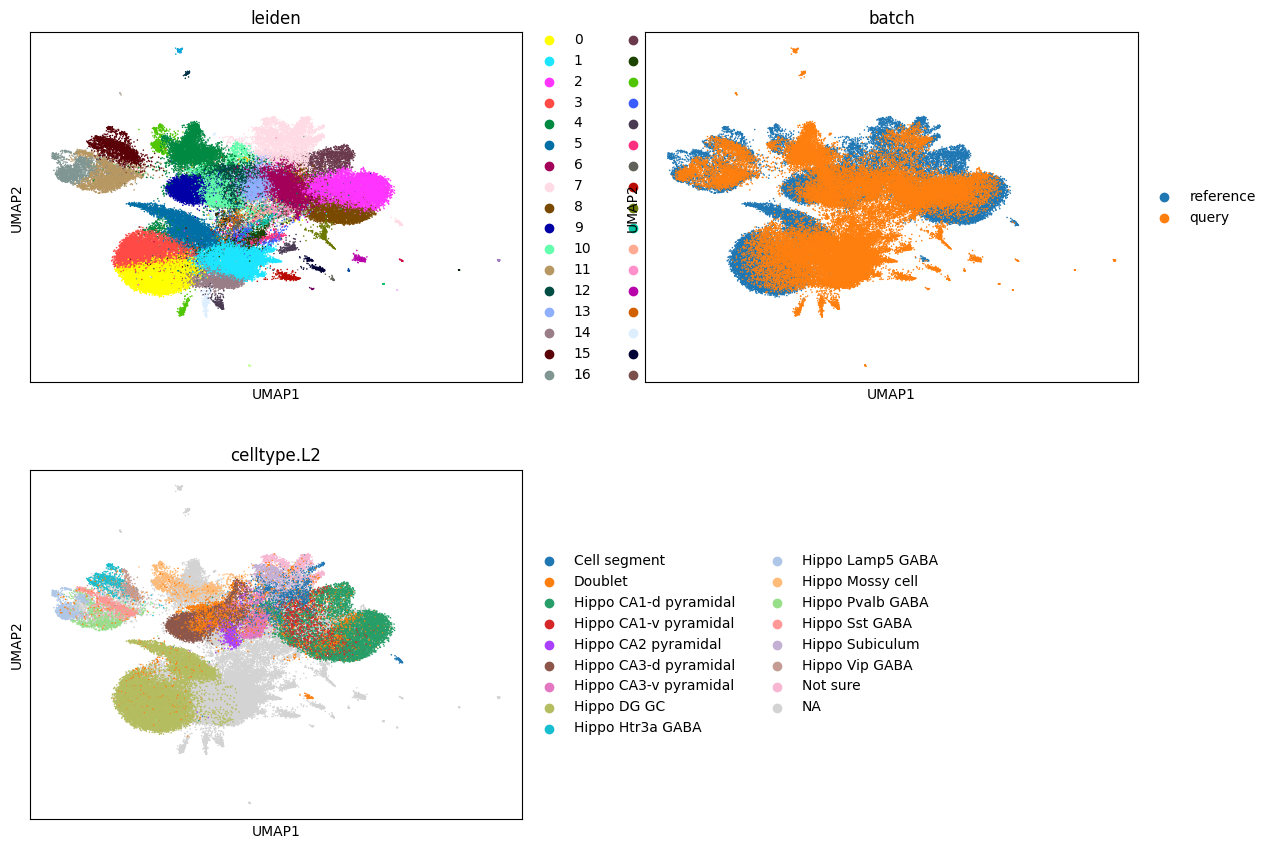

/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/_collections_abc.py:991: ImplicitModificationWarning: Setting element `.obsm['rep']` of view, initializing view as actual.
  self[key] = other[key]
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/_collections_abc.py:991: ImplicitModificationWarning: Setting element `.obsm['X_umap']` of view, initializing view as actual.
  self[key] = other[key]


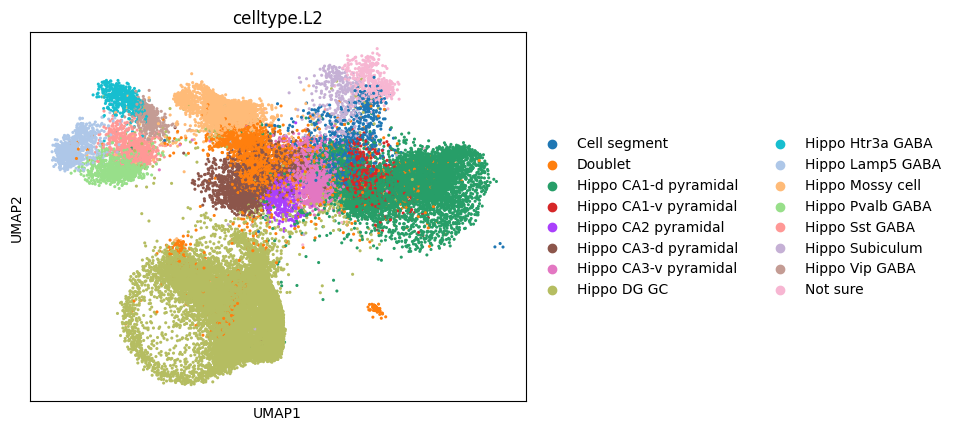

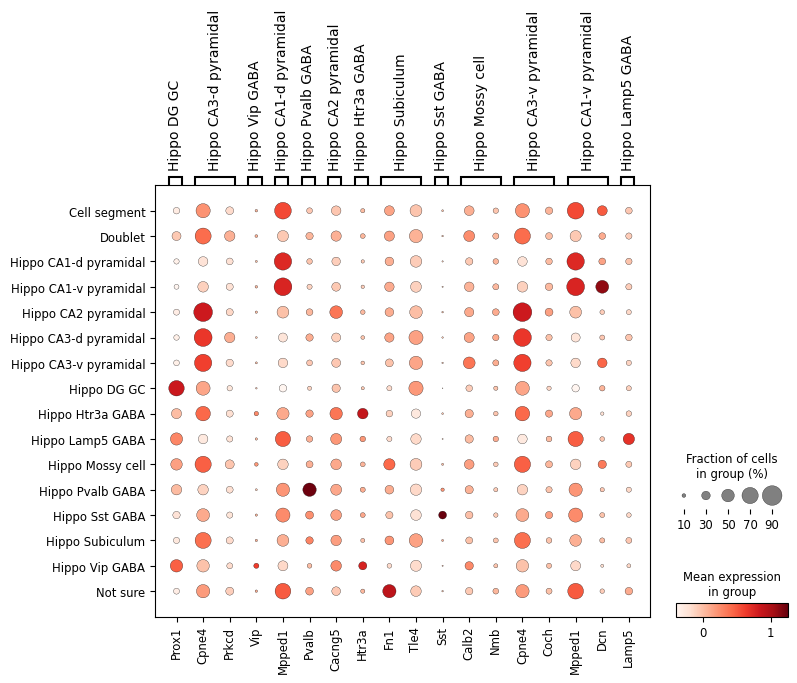

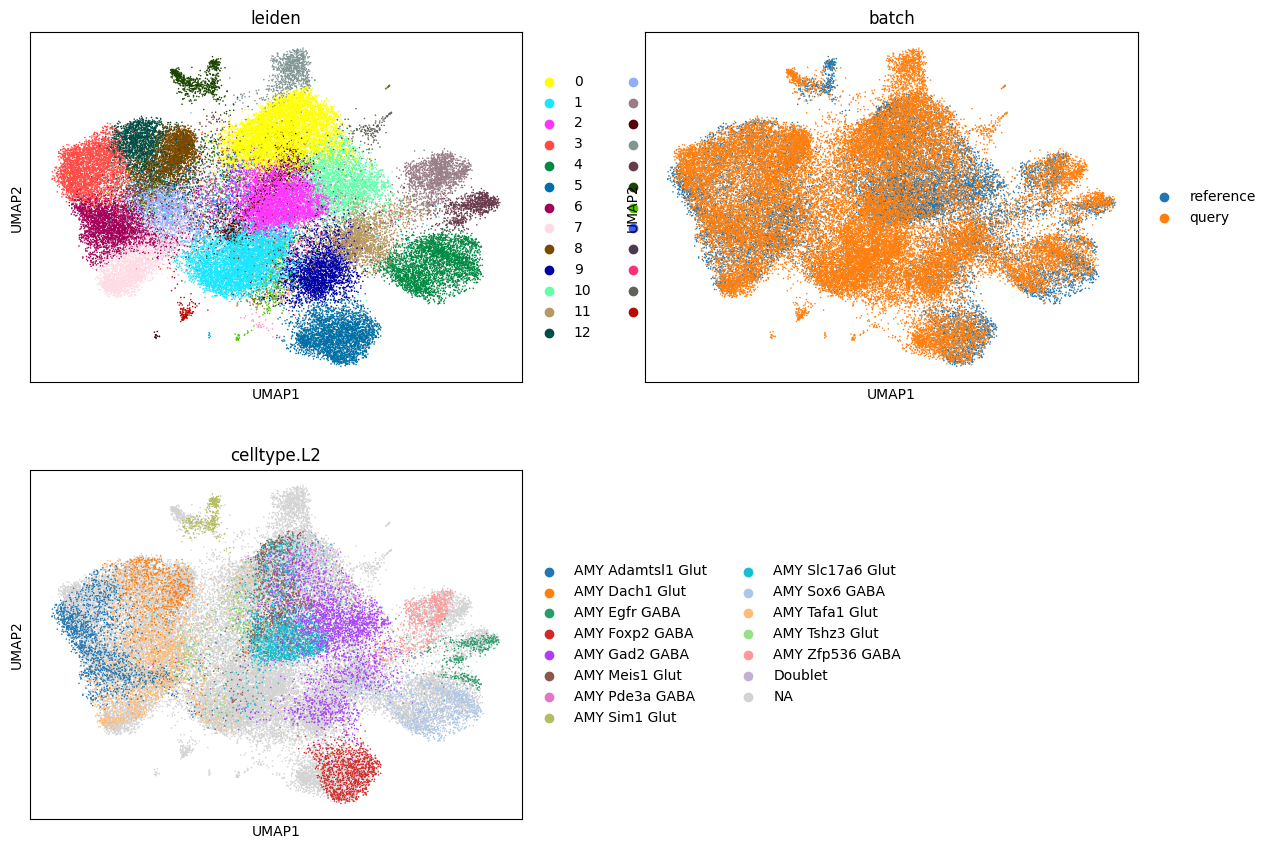

/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/_collections_abc.py:991: ImplicitModificationWarning: Setting element `.obsm['rep']` of view, initializing view as actual.
  self[key] = other[key]
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/_collections_abc.py:991: ImplicitModificationWarning: Setting element `.obsm['X_umap']` of view, initializing view as actual.
  self[key] = other[key]


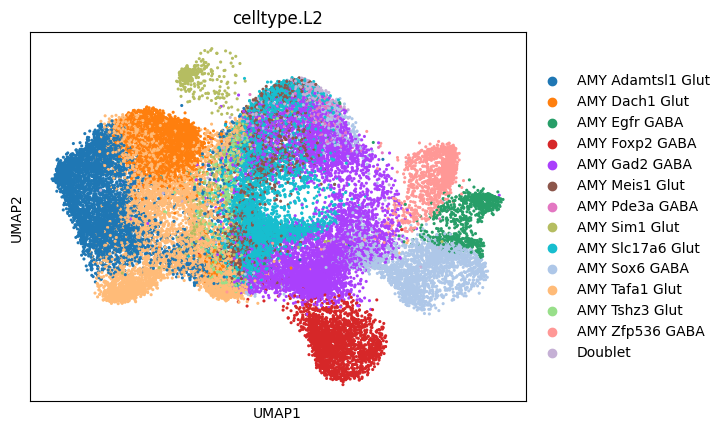

ValueError: left cannot be >= right

<Figure size 150x590 with 0 Axes>

In [ ]:
# region = regions[2]
# celltype = celltypes[2]
for region in regions[:2]:
    for celltype in celltypes:
        adata = sc.read_h5ad(f"/data2st1/junyi/output/atac0416/ATACSC_{region}_{celltype}.h5ad")
        sc.pl.umap(adata, color=['leiden','batch',"celltype.L2"],size=5,ncols=2)
        adata.obsm['X_pca_raw'] = adata.obsm['X_pca']
        adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']
        query = adata[(adata.obs.batch=='query')]
        #refernce = adata[(adata.obs.batch=='reference') & (~adata.obs['celltype.L2'].isin(['Doublet','Not sure']))]
        ref = adata[(adata.obs.batch=='reference')].copy()
        sc.tl.ingest(query,ref, obs='celltype.L2', embedding_method='umap')
        sc.pl.umap(query, color=["celltype.L2"],size=20,ncols=2)
        query.write_h5ad(f"/data2st1/junyi/output/atac0416/ATACSC_{region}_{celltype}_L2annoated.h5ad")
        query.obs.to_csv(f"/data2st1/junyi/output/atac0416/ATACSC_{region}_{celltype}_L2annoated.csv")
        df_region_marker = df_marker[df_marker['region'] == region]
        marker_genes_dict = dict(zip(df_region_marker['celltype.L2'],df_region_marker['marker']))
        for key in marker_genes_dict.keys():
            item = marker_genes_dict[key]
            llist_item = item.split(" ")
            available_list = []

            for list_item in llist_item:
                if list_item in query.var_names:
                    available_list.append(list_item)
                else:
                    print(f"{list_item} not in query var names")
            marker_genes_dict[key] = available_list

        sc.pl.dotplot(query, marker_genes_dict, "celltype.L2", dendrogram=False)


In [91]:
df_region_marker

,region,Neurotransmitter_celltype,celltype.L1,celltype.L2,marker
99,AMY,GABAergic,GABAergic Neuron,AMY Sox6 GABA,Sox6
100,AMY,GABAergic,GABAergic Neuron,AMY Gad2 GABA,NaN
101,AMY,Glutamatergic,Glutamatergic Neuron,AMY Adamtsl1 Glut,Adamtsl1
102,AMY,Glutamatergic,Glutamatergic Neuron,AMY Tafa1 Glut,Tafa1
103,AMY,Glutamatergic,Glutamatergic Neuron,AMY Meis1 Glut,Meis1
104,AMY,GABAergic,GABAergic Neuron,AMY Foxp2 GABA,Foxp2
105,AMY,Glutamatergic,Glutamatergic Neuron,AMY Slc17a6 Glut,NaN
106,AMY,Glutamatergic,Glutamatergic Neuron,AMY Sim1 Glut,Sim1
107,AMY,GABAergic,GABAergic Neuron,AMY Zfp536 GABA,Zfp536
108,AMY,GABAergic,GABAergic Neuron,AMY Pde3a GABA,Pde3a
